In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse  # 导入 Ellipse

# 加载数据
cytorev_data = pd.read_excel('C:/Users/Administrator/Desktop/vandy3rd/Project/CR/Cytokine analysis for revision sinus surgery/Sep2024respositorydeID2.xlsx',
                             sheet_name='out-s1')

# 选择指定的列，注意列名需要与你的数据集中的列名一致
# columns_to_select = ['IL1b', 'IL2', 'IL4', 'IL5', 'IL6', 'IL7', 'IL8', 'IL9', 'IL10', 'IL12', 'IL13', 'IL17A', 'IL21', 
#                     'TNFa', 'IFNg', 'Eotaxin', 'RANTES', 'Phenotype', 'Revision', 'NumSurg', 'NumSurgCat', 'Age']

# 筛选出需要的列
cytorev_data_filtered = cytorev_data.drop(columns=['phenotype', 'number_prior_surgeries'])

# 处理缺失值，将数值列中的缺失值替换为该列的均值
imputer = SimpleImputer(strategy='mean')
cytorev_data_filtered = pd.DataFrame(imputer.fit_transform(cytorev_data_filtered), columns=cytorev_data_filtered.columns)

# 生成summary（描述性统计信息）
summary = cytorev_data_filtered.describe(include='all')
X1 = cytorev_data_filtered
print(summary)

       prior_surgery  eos_hpf_mean_binary  neut_hpf_mean    ct_score  \
count     212.000000           212.000000     212.000000  212.000000   
mean        0.457547             1.770833       8.557292   16.720619   
std         0.499374             0.283498      13.173349    7.123753   
min         0.000000             1.000000       0.000000    2.000000   
25%         0.000000             1.770833       2.700000   13.000000   
50%         0.000000             1.770833       8.557292   16.720619   
75%         1.000000             2.000000       8.557292   20.000000   
max         1.000000             2.000000     126.300000   93.300000   

       eoshpf_mean_path_binary    il1alpha       il1beta          il2  \
count               212.000000  212.000000    212.000000   212.000000   
mean                  1.857820  116.681066    775.292126   101.478060   
std                   0.349235  115.118179   1864.983294   642.463535   
min                   1.000000    0.000000      0.000000   

Importance of components:

      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             2.136078                0.094611               0.094611
PC2             1.685383                0.058898               0.153509
PC3             1.587047                0.052226               0.205735
PC4             1.456448                0.043984               0.249719
PC5             1.453340                0.043797               0.293515
PC6             1.375329                0.039221               0.332736
PC7             1.341545                0.037318               0.370054
PC8             1.309033                0.035531               0.405585
PC9             1.256998                0.032762               0.438347
PC10            1.244842                0.032132               0.470479
PC11            1.209211                0.030319               0.500797
PC12            1.174176                0.028587               0.529385
PC13            1.139893             

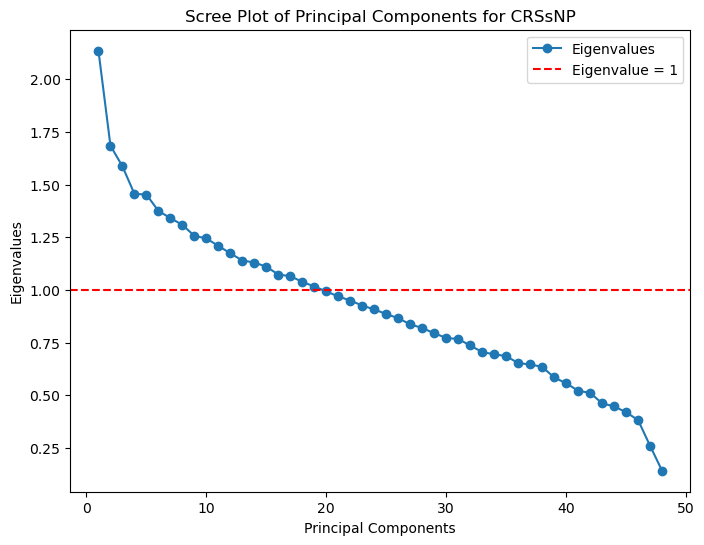

In [27]:
# 选择 "Phenotype" 为 "CRSsNP" 的数据并提取前17列用于PCA分析
X = X1.iloc[:, 1:49]

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA
pca = PCA(n_components=48)  # 保留所有主成分
X_pca = pca.fit_transform(X_scaled)

# 获取PCA结果
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
standard_deviation = np.sqrt(pca.explained_variance_)

# 创建 DataFrame 来组织数据
pca_summary = pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(standard_deviation))])

# 打印类似于图片中的输出格式
print("Importance of components:\n")
print(pca_summary)

# 绘制碎石图 (Scree Plot)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), np.sqrt(pca.explained_variance_), 'o-', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot of Principal Components for CRSsNP')
plt.legend(loc='best')
plt.show()

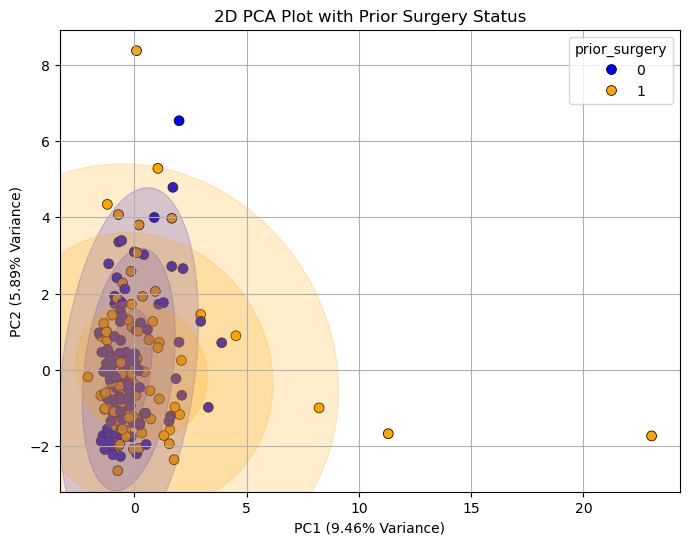

In [28]:
# 选择 "Phenotype" 为 "CRSsNP" 的数据并提取前17列用于PCA分析
X = X1.iloc[:, 1:49]
y = X1['prior_surgery'].astype(int)

# 将修订状态列中的 'Yes' 和 'No' 转换为数值 1 和 0
# y_numeric = y.map({'Yes': 1, 'No': 0})

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA
pca = PCA(n_components=2)  # 保留两个主成分用于可视化
X_pca = pca.fit_transform(X_scaled)

# 创建PCA结果的DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['prior_surgery'] = y.values  # 添加修订手术状态

# 调整颜色顺序，确保 No 是蓝色，Yes 是橙色
palette = ['blue', 'orange']  # No -> blue, Yes -> orange

# 绘制PCA散点图，使用手动定义的颜色
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='prior_surgery', data=pca_df, palette=palette, s=50, edgecolor="black")

# 添加椭圆形
def draw_ellipse(position, covariance, ax, **kwargs):
    """添加椭圆形的辅助函数"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))

# 根据修订状态绘制不同的椭圆形区域
groups = pca_df.groupby('prior_surgery')
ax = plt.gca()

# 使用与散点图一致的颜色映射
colors = {0: 'blue', 1: 'orange'}

for name, group in groups:
    cov = np.cov(group[['PC1', 'PC2']].values.T)
    mean = group[['PC1', 'PC2']].mean().values
    draw_ellipse(mean, cov, ax, alpha=0.2, color=colors[name])

plt.title('2D PCA Plot with Prior Surgery Status')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='prior_surgery')
plt.grid(True)
plt.show()

In [29]:
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA
pca = PCA(n_components=19)  # 保留前6个主成分
X_pca = pca.fit_transform(X_scaled)

# 计算载荷矩阵 (rotation matrix)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# 计算cutoff值
cutoff = np.sqrt(1/X.shape[1])

# 标记显著载荷并加粗显示
styled_loadings = loadings.style.applymap(lambda val: 'font-weight: bold' if abs(val) > cutoff else '')

# 输出载荷矩阵
styled_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
eos_hpf_mean_binary,0.003769,-0.060367,-0.151531,0.274735,-0.119108,-0.005247,-0.032266,-0.170478,0.018298,-0.065496,0.279864,-0.373514,0.214313,0.062819,0.177944,0.075741,-0.082627,-0.117745,-0.018273
neut_hpf_mean,0.048325,0.020104,0.221847,-0.075545,0.034114,0.130744,-0.025462,0.224112,-0.105914,0.109357,-0.019665,0.081039,-0.195758,0.172465,0.061749,-0.122532,-0.069994,0.340787,0.207854
ct_score,0.019548,-0.070593,0.050345,0.035783,0.105186,0.181311,-0.133618,0.041245,0.208371,-0.044239,-0.018616,-0.015286,0.374672,0.045683,-0.153480,0.210007,0.178004,0.103005,0.065683
eoshpf_mean_path_binary,0.031090,-0.056313,-0.122229,0.341623,-0.031351,0.084826,-0.124550,-0.211556,0.116043,-0.023203,0.157650,-0.348327,-0.017805,0.017585,-0.019086,-0.023695,-0.054128,0.275363,0.186079
il1alpha,0.109536,0.119408,0.070993,0.062748,-0.082766,0.028982,0.055800,-0.194123,-0.129141,0.011145,0.100528,0.221983,-0.036817,-0.126986,0.040630,0.382120,-0.248581,-0.017040,0.291412
il1beta,0.078076,0.270929,0.328228,-0.036089,0.251092,-0.098054,0.084264,-0.239475,-0.052374,0.102037,0.034238,-0.032729,-0.063038,-0.099990,-0.064182,0.070497,0.047948,0.083949,0.033911
il2,0.059363,0.077171,-0.060996,-0.034289,-0.004985,-0.035102,0.147541,0.111723,0.416329,0.009357,-0.133358,0.036770,-0.009376,-0.003524,0.258794,-0.079373,-0.254131,0.058507,-0.293846
il3,-0.007425,-0.083151,-0.181485,-0.122369,0.170835,0.449110,0.389218,-0.098479,-0.118816,0.097259,0.035400,-0.012126,-0.011833,-0.019998,-0.007614,-0.019152,-0.023173,-0.001371,-0.045257
il4,0.414045,-0.033751,-0.112481,-0.134742,-0.073648,-0.004784,-0.019971,-0.053144,0.140447,-0.093984,0.103974,0.070215,-0.034958,0.002542,-0.061570,-0.042812,0.076803,0.009722,0.014505
il5,0.127419,-0.102230,0.146298,0.382244,0.083134,0.217703,-0.108309,0.219842,-0.119210,-0.124982,-0.041168,0.027333,-0.167547,-0.119743,0.026531,-0.093315,0.044397,-0.059458,-0.074369


In [30]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.formula.api import glm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# 选择 "Phenotype" 为 "CRSsNP" 的数据并提取前17列用于PCA分析
X = X1.iloc[:, 1:49]
y = X1['prior_surgery'].astype(int)

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA并提取前6个主成分
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X_scaled)

# 创建包含PCA主成分和Revision状态的DataFrame
df_pc_crs = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(19)])
df_pc_crs['prior_surgery'] = y

# 执行逻辑回归分析（与R中的glm相似）
model = sm.Logit(df_pc_crs['prior_surgery'], add_constant(df_pc_crs.iloc[:, :-1]))
result = model.fit()

# 输出逻辑回归模型的摘要信息
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.600657
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          prior_surgery   No. Observations:                  212
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.1289
Time:                        10:54:15   Log-Likelihood:                -127.34
converged:                       True   LL-Null:                       -146.18
Covariance Type:            nonrobust   LLR p-value:                  0.006505
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1800      0.156     -1.156      0.248      -0.485       0.125
PC1            0.1642      0.

In [31]:
# 逐步回归（stepwise selection）
# 使用递归特征消除和交叉验证来进行逐步回归，类似于R中的stepAIC
log_reg = LogisticRegression(solver='liblinear')
selector = RFECV(log_reg, step=1, cv=15)  # 递归特征消除
selector.fit(X_pca, y)

# 获取最终选择的特征
selected_features = selector.support_

# 打印选择的特征
print("Selected features (PC1 to PC20):", selected_features)

# 使用选择的特征重新拟合模型
X_selected = X_pca[:, selected_features]  # 只保留选中的特征
model_stepwise = sm.Logit(df_pc_crs['prior_surgery'], add_constant(X_selected))
result_stepwise = model_stepwise.fit()

# 输出逐步回归后的模型摘要
print(result_stepwise.summary())

Selected features (PC1 to PC20): [ True False False  True False  True False False  True  True  True False
  True False False False  True  True False]
Optimization terminated successfully.
         Current function value: 0.606685
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          prior_surgery   No. Observations:                  212
Model:                          Logit   Df Residuals:                      202
Method:                           MLE   Df Model:                            9
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.1202
Time:                        10:54:18   Log-Likelihood:                -128.62
converged:                       True   LL-Null:                       -146.18
Covariance Type:            nonrobust   LLR p-value:                 5.652e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [32]:
# 导入必要的库
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# 加载数据
cytorev_data = pd.read_excel('C:/Users/Administrator/Desktop/vandy3rd/Project/CR/Cytokine analysis for revision sinus surgery/Sep2024respositorydeID2.xlsx', 
                             sheet_name='out-s2')

# 选择指定的列
# columns_to_select = ['IL1b', 'IL2', 'IL4', 'IL5', 'IL6', 'IL7', 'IL8', 'IL9', 'IL10', 'IL12', 'IL13', 'IL17A', 'IL21', 
#                     'TNFa', 'IFNg', 'Eotaxin', 'RANTES', 'Phenotype', 'NumSurg', 'Age']
# cytorev_data_filtered = cytorev_data[columns_to_select]

# 筛选出需要的列
cytorev_data_filtered = cytorev_data.drop(columns=['phenotype', 'prior_surgery'])

# 处理缺失值，将数值列中的缺失值替换为该列的均值
imputer = SimpleImputer(strategy='mean')
cytorev_data_filtered = pd.DataFrame(imputer.fit_transform(cytorev_data_filtered), columns=cytorev_data_filtered.columns)


# 选择 "Phenotype" 为 "CRSsNP" 的数据并提取前17列用于PCA分析
X = cytorev_data_filtered.iloc[:, 1:49]
y_num_surg = cytorev_data_filtered['number_prior_surgeries']
#.astype(int)
# age = cytorev_data_filtered.loc[cytorev_data_filtered['Phenotype'] == 'CRSsNP', 'Age']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA并提取前6个主成分
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X_scaled)

# 创建包含PCA主成分, NumSurg 和 Age 的 DataFrame
df_pc_crs = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(19)])
df_pc_crs['number_prior_surgeries'] = pd.to_numeric(y_num_surg)
# df_pc_crs['Age'] = age.values

# 使用泊松回归拟合手术次数（NumSurg）的预测模型
model_poisson = sm.GLM(df_pc_crs['number_prior_surgeries'], sm.add_constant(df_pc_crs.drop(columns='number_prior_surgeries')), family=sm.families.Poisson())
result_poisson = model_poisson.fit()

# 输出泊松回归模型的摘要
print(result_poisson.summary())


                   Generalized Linear Model Regression Results                    
Dep. Variable:     number_prior_surgeries   No. Observations:                  212
Model:                                GLM   Df Residuals:                      192
Model Family:                     Poisson   Df Model:                           19
Link Function:                        Log   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -232.29
Date:                    Sun, 17 Nov 2024   Deviance:                       238.33
Time:                            10:58:26   Pearson chi2:                     253.
No. Iterations:                         5   Pseudo R-squ. (CS):             0.2556
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [33]:
from itertools import combinations
# 初始泊松回归模型
def fit_poisson_model(X, y):
    model = sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson())
    result = model.fit()
    return result

# 逐步回归实现（手动执行前进和后退选择）
def stepwise_selection(X, y, direction='both', verbose=False):
    initial_features = list(X.columns)
    best_features = initial_features.copy()
    best_model = fit_poisson_model(X[best_features], y)
    best_aic = best_model.aic

    if direction == 'both':
        improved = True
        while improved:
            improved = False
            # 尝试向前和向后进行特征选择
            for feature_set in [combinations(best_features, len(best_features) - 1), 
                                combinations(X.columns, len(best_features) + 1)]:
                for features in feature_set:
                    features = list(features)
                    model = fit_poisson_model(X[features], y)
                    aic = model.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_features = features
                        best_model = model
                        improved = True
                        if verbose:
                            print(f"Model improved with features {best_features}, AIC: {best_aic}")
    
    return best_model, best_features

# 执行逐步回归（基于AIC进行逐步特征选择）
best_model, best_features = stepwise_selection(df_pc_crs.drop(columns='number_prior_surgeries'), df_pc_crs['number_prior_surgeries'], verbose=True)

# 输出逐步回归后的泊松回归模型的摘要
print(best_model.summary())
print(f"Selected features: {best_features}")

Model improved with features ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'], AIC: 504.57318600932695
Model improved with features ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC19'], AIC: 504.0232582433665
Model improved with features ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC18', 'PC19'], AIC: 503.58788451645046
Model improved with features ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC17', 'PC18', 'PC19'], AIC: 503.20060559534807
Model improved with features ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'], AIC: 502.6572656836099
Model improved with features ['PC1', 'PC2', 'PC3', '